# Nicaviz Demo

_By Nicapotato_

In [1]:
%reload_ext autoreload
%autoreload 2
%load_ext watermark

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
import pandas as pd
import numpy as np
from numpy import random
import nicaviz
import seaborn as sns
import time

notebookstart = time.time()

sns.set_style("whitegrid")

%watermark 
%watermark --iversions

Last updated: 2022-10-07T13:48:42.304189+01:00

Python implementation: CPython
Python version       : 3.7.7
IPython version      : 7.13.0

Compiler    : Clang 4.0.1 (tags/RELEASE_401/final)
OS          : Darwin
Release     : 20.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 12
Architecture: 64bit

pandas : 1.2.3
numpy  : 1.21.5
seaborn: 0.10.1
nicaviz: 0.1.4



In [4]:
def random_dates(start, end, n=10):

    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

DFLEN = 10000
df = pd.DataFrame({
    'int_small': random.randint(low=0, high=5, size=DFLEN),
    'int_med': random.randint(low=0, high=20, size=DFLEN),
    'str_med': random.choice(["a","b","c","d","e","f","g"], size=DFLEN),
    'str_med_two': random.choice([x for x in "qwerty"], size=DFLEN),
    'str_small': random.choice(["blue","red"], size=DFLEN),
    'bool': random.choice([True,False], size=DFLEN),
    'cont_rand': random.random(size=DFLEN)*10,
    'cont_uni': random.normal(loc=0, scale=1, size=DFLEN)*10,
    'date': pd.date_range(start='1/1/2018', periods=DFLEN),
    'timestamp': random_dates(pd.to_datetime('2018-01-01'), pd.to_datetime('2018-03-01'), n=DFLEN)
    })

display(df.sample(10))

,int_small,int_med,str_med,str_med_two,str_small,bool,cont_rand,cont_uni,date,timestamp
7770,1,3,a,q,red,False,7.906810,-14.004294,2039-04-11,2018-02-15 03:19:32
3520,3,8,d,q,blue,True,2.683986,-1.850273,2027-08-22,2018-02-02 02:32:42
3273,0,14,d,w,blue,True,3.921304,5.922378,2026-12-18,2018-02-25 23:33:38
8502,3,7,c,r,red,True,5.867554,11.778553,2041-04-12,2018-02-16 15:10:58
8015,0,15,a,w,red,False,0.662640,-4.412439,2039-12-12,2018-01-15 04:33:13
5841,3,11,d,w,blue,False,2.746289,-6.186013,2033-12-29,2018-02-08 02:14:03
6598,2,18,a,t,blue,False,8.335683,-0.430172,2036-01-25,2018-02-17 20:02:07
8838,0,9,c,e,red,True,3.178386,4.997169,2042-03-14,2018-01-29 13:02:36
982,3,5,c,y,red,True,0.379712,3.560288,2020-09-09,2018-01-22 04:52:47
2066,1,12,e,q,red,False,3.756654,-10.943001,2023-08-29,2018-01-10 10:14:26


In [5]:
df.head()

,int_small,int_med,str_med,str_med_two,str_small,bool,cont_rand,cont_uni,date,timestamp
0,4,17,f,e,red,True,1.585650,19.592706,2018-01-01,2018-02-16 02:25:49
1,4,9,b,t,blue,False,7.958347,-7.725737,2018-01-02,2018-01-21 09:04:37
2,3,17,a,y,blue,True,9.182390,2.365871,2018-01-03,2018-01-02 16:44:34
3,2,13,d,e,blue,False,4.492815,3.179038,2018-01-04,2018-01-06 07:35:49
4,4,0,d,q,blue,False,8.282302,-2.445916,2018-01-05,2018-02-17 01:39:56


In [6]:
df.nica.categorical_describe()

Dataframe Dimension: 10000 Rows, 10 Columns


,Unique,Missing,dtype,ValCount 1,Occ,ValCount 2,Occ,ValCount 3,Occ,ValCount 4,Occ,ValCount 5,Occ
Column,,,,,,,,,,,,,
int_small,5,0,int64,4,2021,2,2016,1,2008.0,0,1979.0,3,1976.0
int_med,20,0,int64,15,550,2,536,9,532.0,3,528.0,4,527.0
str_med,7,0,object,a,1456,d,1451,b,1447.0,g,1439.0,e,1410.0
str_med_two,6,0,object,w,1725,y,1683,t,1683.0,q,1672.0,e,1630.0
str_small,2,0,object,blue,5024,red,4976,NaN,NaN,NaN,NaN,NaN,NaN
bool,2,0,bool,False,5029,True,4971,NaN,NaN,NaN,NaN,NaN,NaN
cont_rand,10000,0,float64,2.815264,1,5.711287,1,5.827921,1.0,8.703882,1.0,6.283784,1.0
cont_uni,10000,0,float64,18.253637,1,-8.788293,1,12.255537,1.0,-8.559634,1.0,1.71293,1.0
date,10000,0,datetime64[ns],2026-04-30 00:00:00,1,2028-10-21 00:00:00,1,2018-06-09 00:00:00,1.0,2019-07-31 00:00:00,1.0,2023-01-02 00:00:00,1.0


In [7]:
with nicaviz.timer("Reduce Memory"):
    df, na_list = nicaviz.reduce_mem_usage(df)

DF Memory Before  :            0.70 MB
DF Memory After   :            0.49 MB
Reduced by        :           30.13 %

Numeric Columns with NAN replaced with -1:
[]
[Reduce Memory] done in 0.0 s


In [8]:
df.nica.categorical_describe()

Dataframe Dimension: 10000 Rows, 10 Columns


,Unique,Missing,dtype,ValCount 1,Occ,ValCount 2,Occ,ValCount 3,Occ,ValCount 4,Occ,ValCount 5,Occ
Column,,,,,,,,,,,,,
int_small,5,0,uint8,4,2021,2,2016,1,2008.0,0,1979.0,3,1976.0
int_med,20,0,uint8,15,550,2,536,9,532.0,3,528.0,4,527.0
str_med,7,0,object,a,1456,d,1451,b,1447.0,g,1439.0,e,1410.0
str_med_two,6,0,object,w,1725,y,1683,t,1683.0,q,1672.0,e,1630.0
str_small,2,0,object,blue,5024,red,4976,NaN,NaN,NaN,NaN,NaN,NaN
bool,2,0,bool,False,5029,True,4971,NaN,NaN,NaN,NaN,NaN,NaN
cont_rand,9997,0,float32,1.558539,2,8.345382,2,4.706358,2.0,3.357949,1.0,2.572229,1.0
cont_uni,10000,0,float32,11.053837,1,10.894208,1,-11.33866,1.0,-5.548583,1.0,-3.384341,1.0
date,10000,0,datetime64[ns],2026-04-30 00:00:00,1,2028-10-21 00:00:00,1,2018-06-09 00:00:00,1.0,2019-07-31 00:00:00,1.0,2023-01-02 00:00:00,1.0


[Count Plot] done in 0.0 s


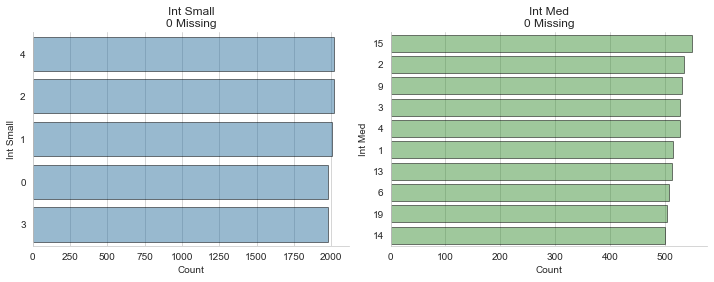

In [9]:
with nicaviz.timer("Count Plot"):
    df.nica.mass_plot(
        plt_set= ["int_small", "int_med"],
        plottype = "countplot")

[Bar Plot] done in 0.0 s


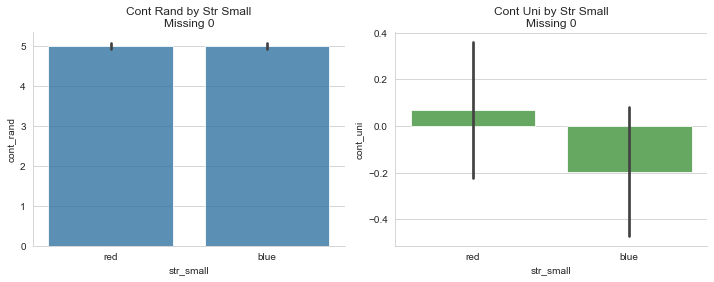

In [10]:
with nicaviz.timer("Bar Plot"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        x_var = "str_small",
        plottype = "bar")

[Boxplots] done in 0.0 s


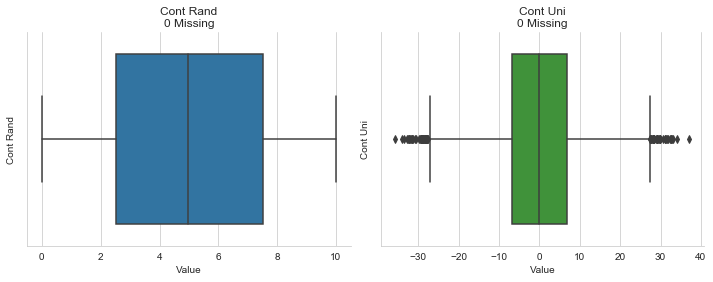

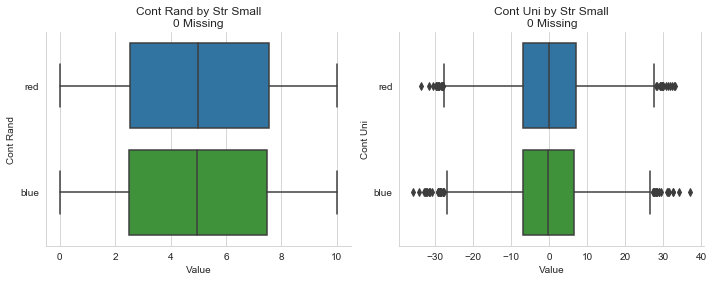

In [11]:
with nicaviz.timer("Boxplots"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        plottype = "boxplot")

    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        hue = "str_small",
        plottype = "boxplot")

[Distplots] done in 0.0 s


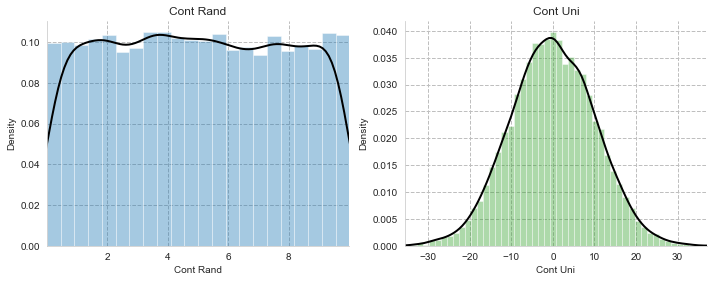

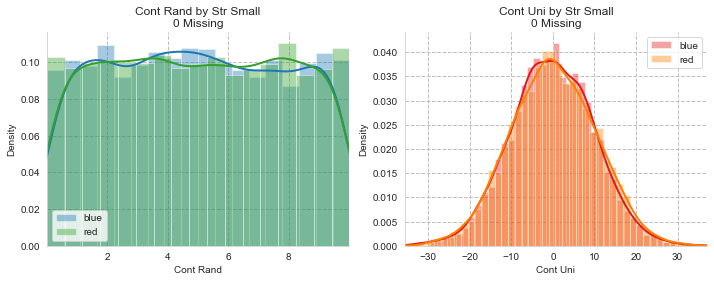

In [12]:
with nicaviz.timer("Distplots"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        plottype = "distplot")

    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        hue = "str_small",
        plottype = "distplot")

[Distplots] done in 0.0 s


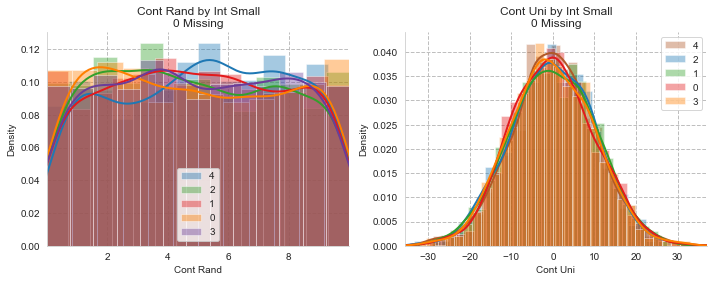

In [13]:
with nicaviz.timer("Distplots"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        hue = "int_small",
        plottype = "distplot")

[Countplot] done in 0.0 s


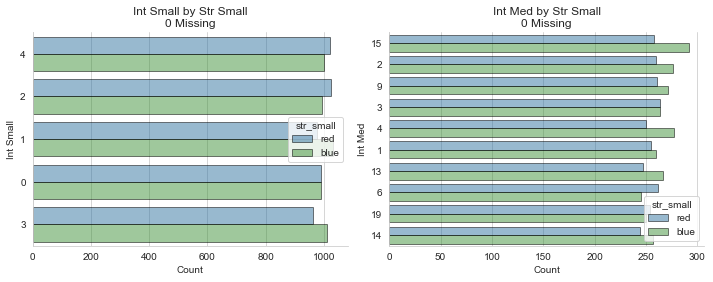

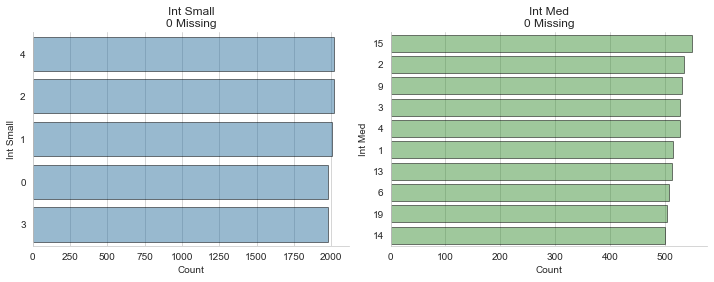

In [14]:
with nicaviz.timer("Countplot"):
    df.nica.mass_plot(
        plt_set= ["int_small", "int_med"],
        hue = "str_small",
        plottype = "countplot")

    df.nica.mass_plot(
        plt_set= ["int_small", "int_med"],
        plottype = "countplot")

### Time Series

[Timeserie Resample Plot] done in 0.0 s


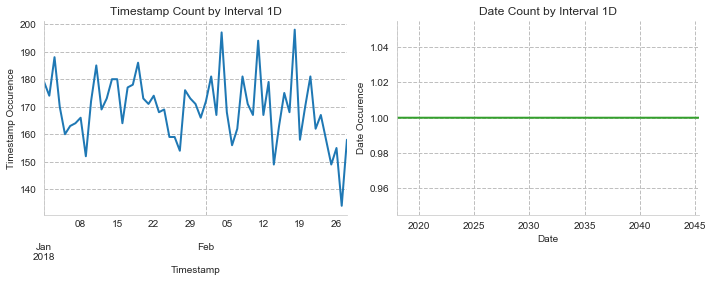

In [15]:
with nicaviz.timer("Timeserie Resample Plot"):
    df.nica.mass_plot(
        plt_set= ["timestamp", "date"],
        plottype = "ts_resample",
        resample=True,
        resample_interval="1D"
    )

[Timeserie Resample Plot] done in 0.0 s


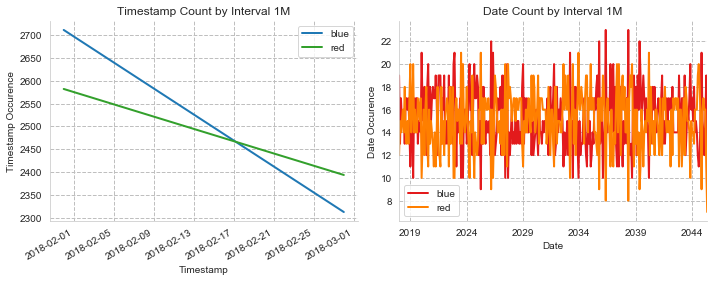

In [16]:
with nicaviz.timer("Timeserie Resample Plot"):
    df.nica.mass_plot(
        plt_set= ["timestamp", "date"],
        plottype = "ts_resample",
        resample=True,
        hue = "str_small",
        resample_interval="1M"
    )

[Timeserie Rolling Plot] done in 0.0 s


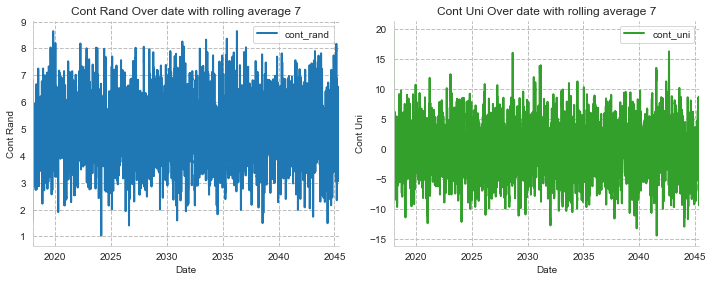

In [17]:
with nicaviz.timer("Timeserie Rolling Plot"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        plottype = "ts_rolling",
        x_var="date",
        rolling=True,
        r=7
    )

[Timeserie Rolling Plot] done in 0.0 s


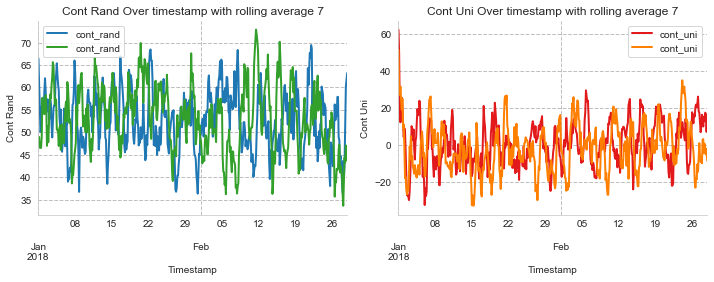

In [18]:
with nicaviz.timer("Timeserie Rolling Plot"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        plottype = "ts_rolling",
        hue = "str_small",
        x_var="timestamp",
        rolling=True,
        time_resample='3H',
        r=7
    )

[Timeserie Rolling Plot] done in 0.0 s


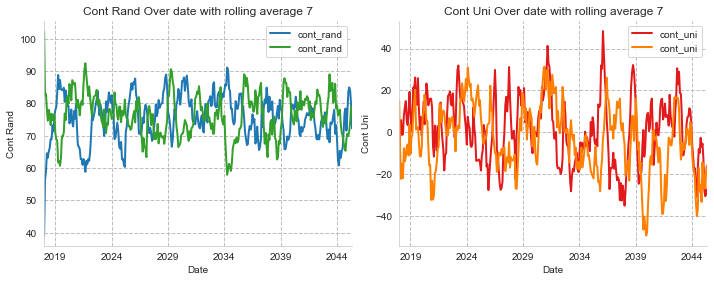

In [19]:
with nicaviz.timer("Timeserie Rolling Plot"):
    df.nica.mass_plot(
        plt_set= ["cont_rand", "cont_uni"],
        plottype = "ts_rolling",
        hue = "str_small",
        x_var="date",
        rolling=True,
        time_resample='1M',
        r=7
    )

### WordClouds

[Wordcloud Plot] done in 0.0 s


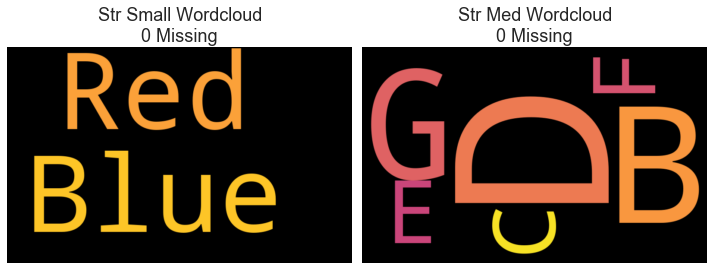

In [20]:
with nicaviz.timer("Wordcloud Plot"):
    df.nica.mass_plot(
        plt_set= ["str_small", "str_med"],
        plottype = "wordcloud")

### Rank Correlations

[Correlation Plot] done in 5.0 s


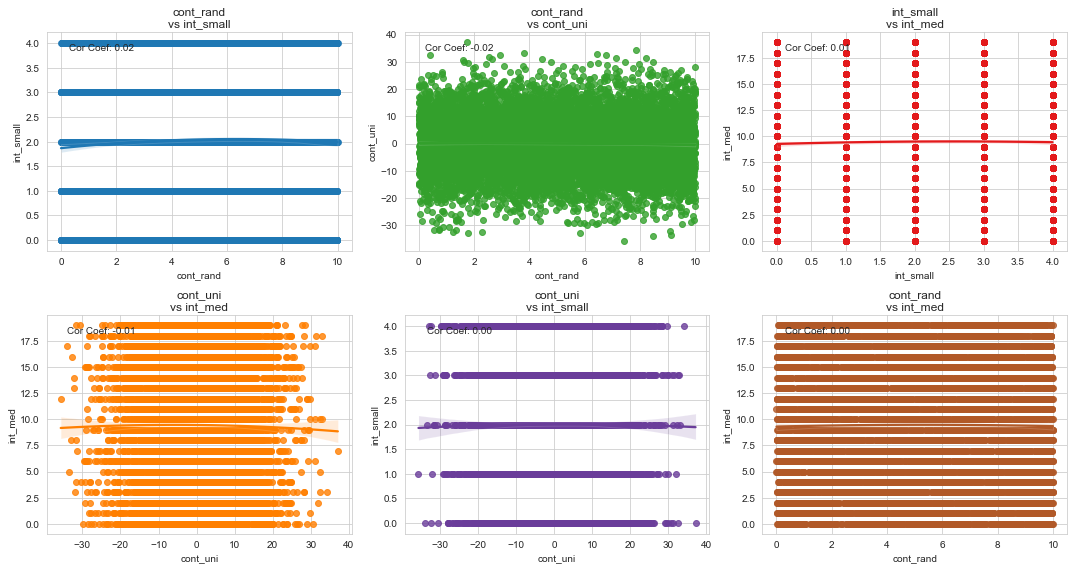

In [21]:
with nicaviz.timer("Correlation Plot"):
    df.nica.rank_correlations_plots(["cont_rand", "cont_uni", "int_small", "int_med"], 9)

### Pivot Heatmaps

[Pivot Heatmap Plot] done in 8.0 s


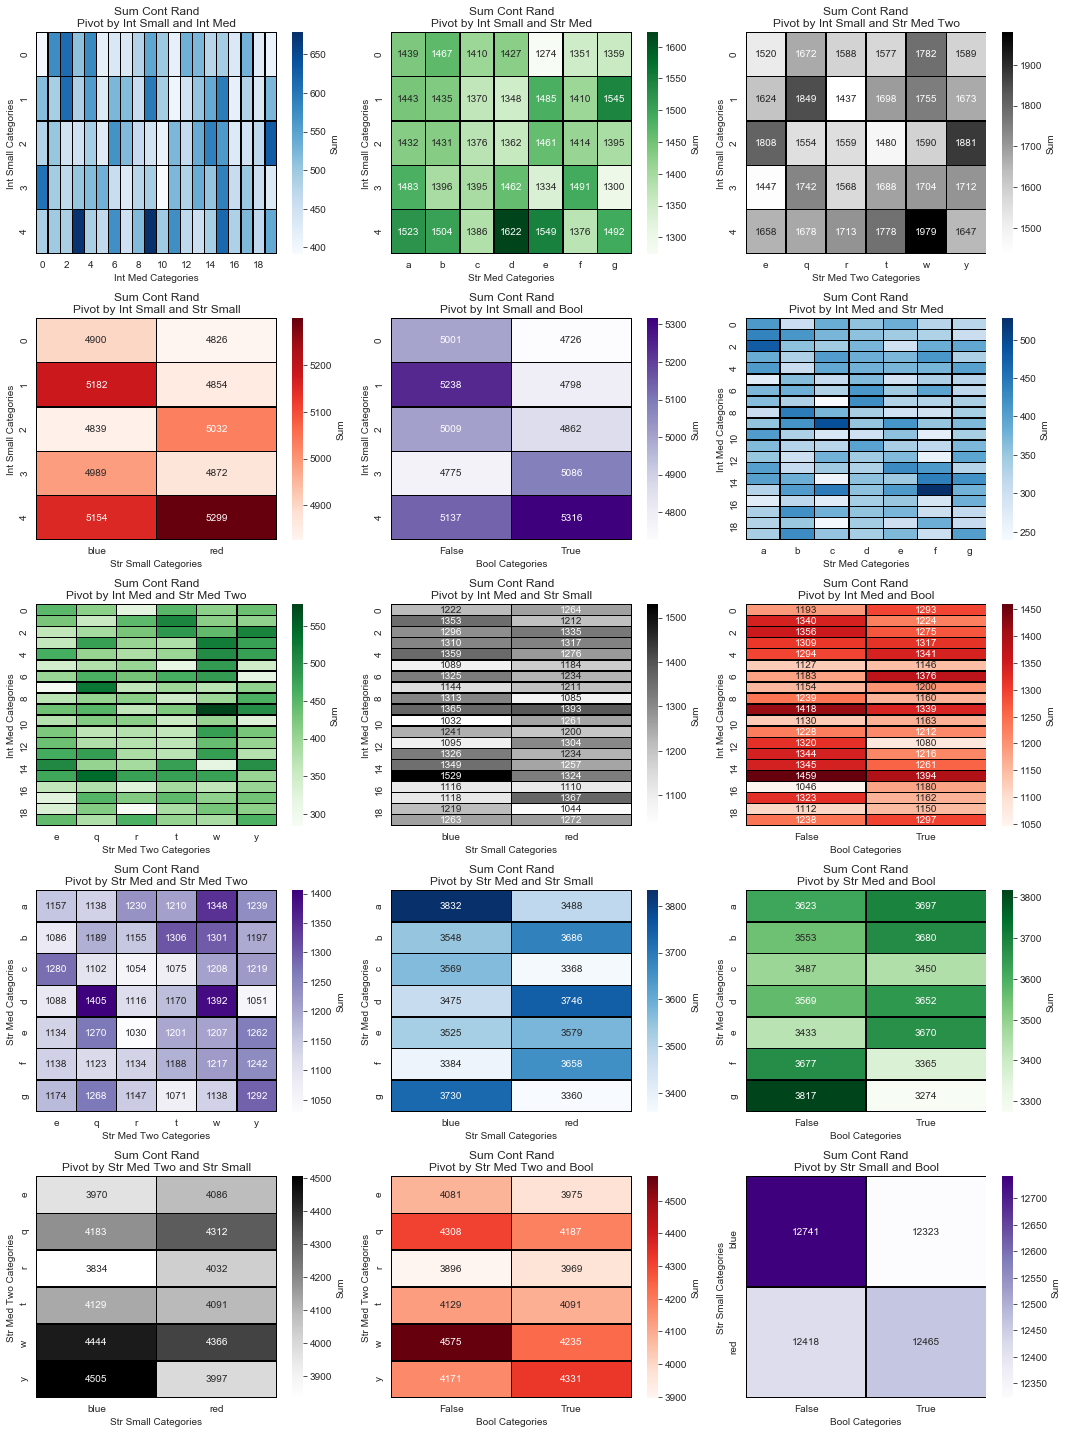

In [22]:
with nicaviz.timer("Pivot Heatmap Plot"):
    categorical = ['int_small', 'int_med', 'str_med', 'str_med_two', 'str_small', 'bool']
    df.nica.pivot_plots(categorical, "cont_rand", np.sum)

[Pivot Heatmap Plot] done in 8.0 s


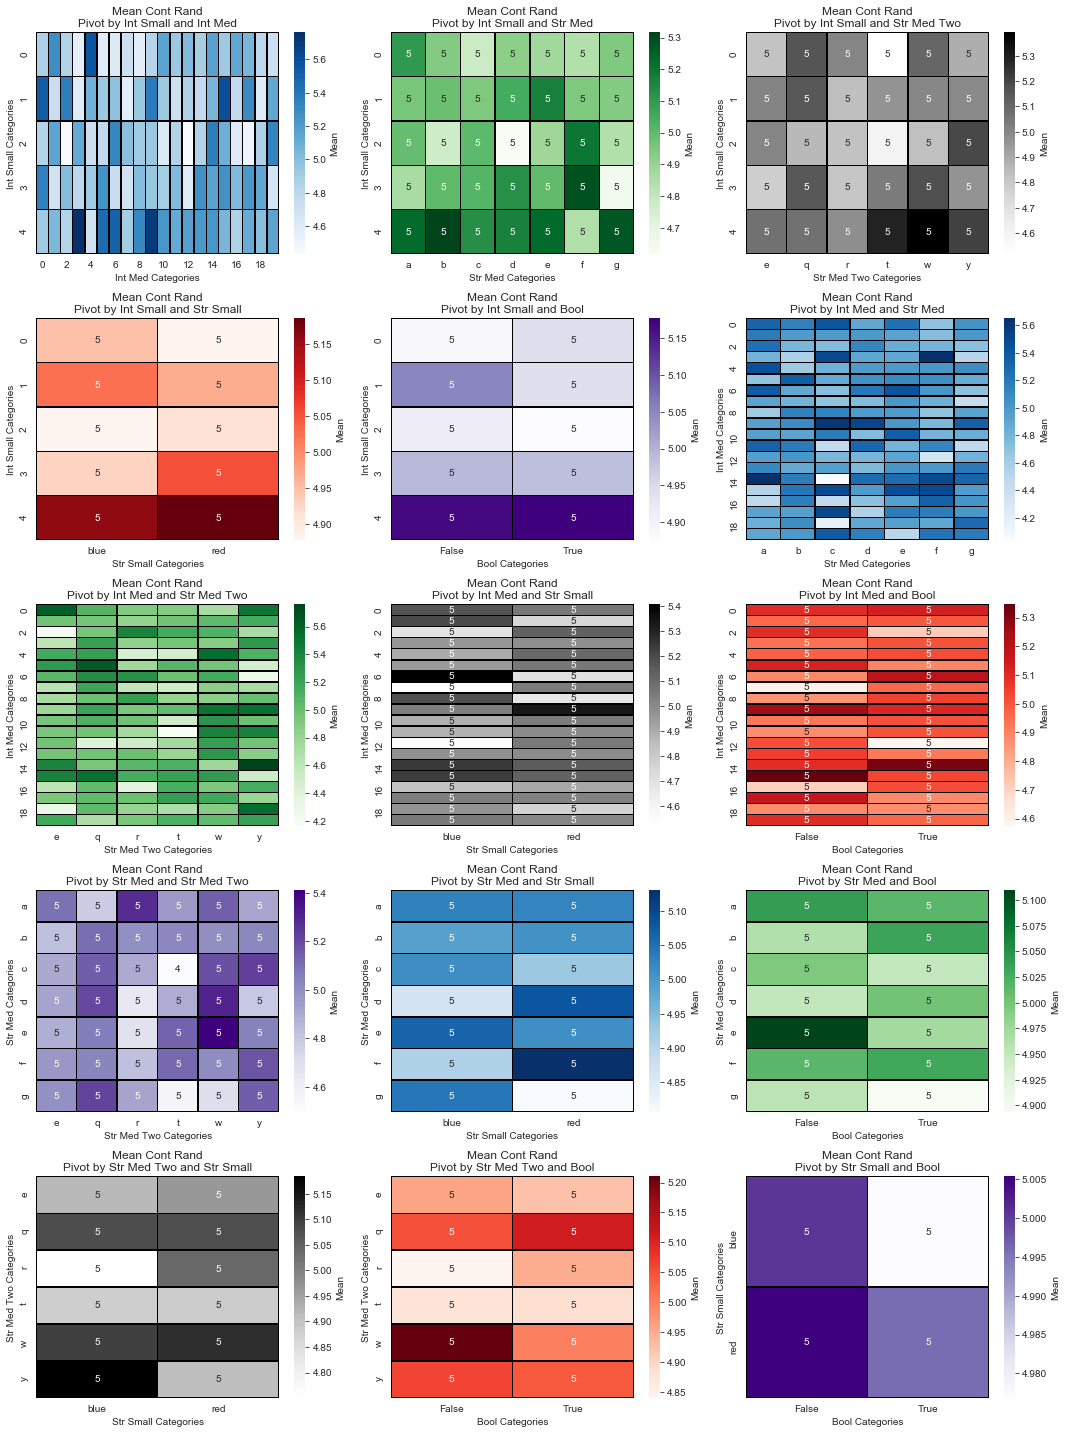

In [23]:
with nicaviz.timer("Pivot Heatmap Plot"):
    df.nica.pivot_plots(categorical, "cont_rand", np.mean)

In [24]:
print("Notebook Runtime: %0.2f Minutes"%((time.time() - notebookstart)/60))

Notebook Runtime: 0.61 Minutes
